In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1831,2020-10-02,United Kingdom,458634.0,460178.0,42225.0,42202.0,-1544.0,23.0
1832,2020-10-02,Germany,293271.0,294395.0,9518.0,9508.0,-1124.0,10.0
1833,2020-10-02,Iran,460215.0,461044.0,26386.0,26380.0,-829.0,6.0
1834,2020-10-02,Turkey,319837.0,320070.0,8251.0,8262.0,-233.0,-11.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11715.06862745098
RMSE =  42072.5055541182


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  320.51143790849676
RMSE =  808.786665886025


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  86716.86705202312
RMSE =  133275.9605972996
-- World performances for deaths --
MAE =  1934.942196531792
RMSE =  2352.4845886603366


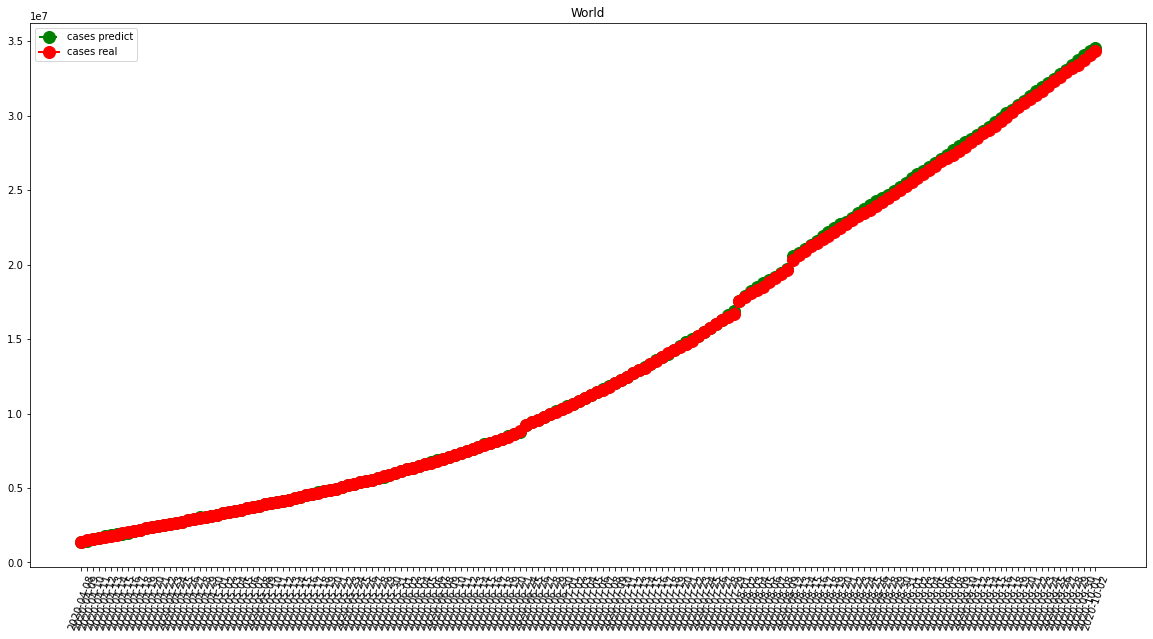

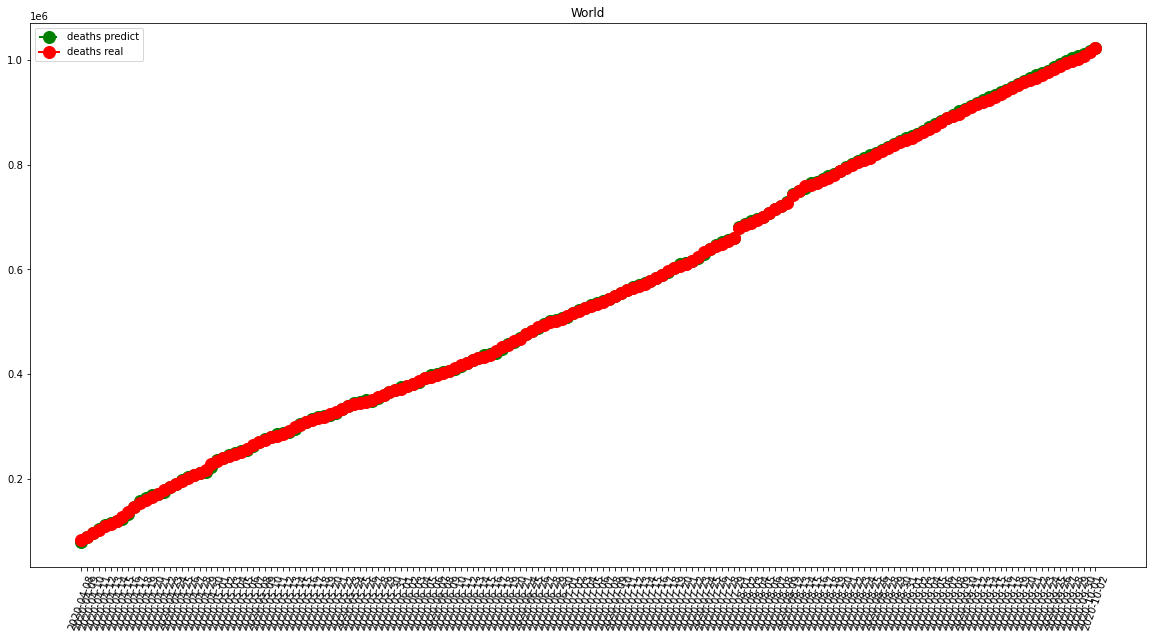

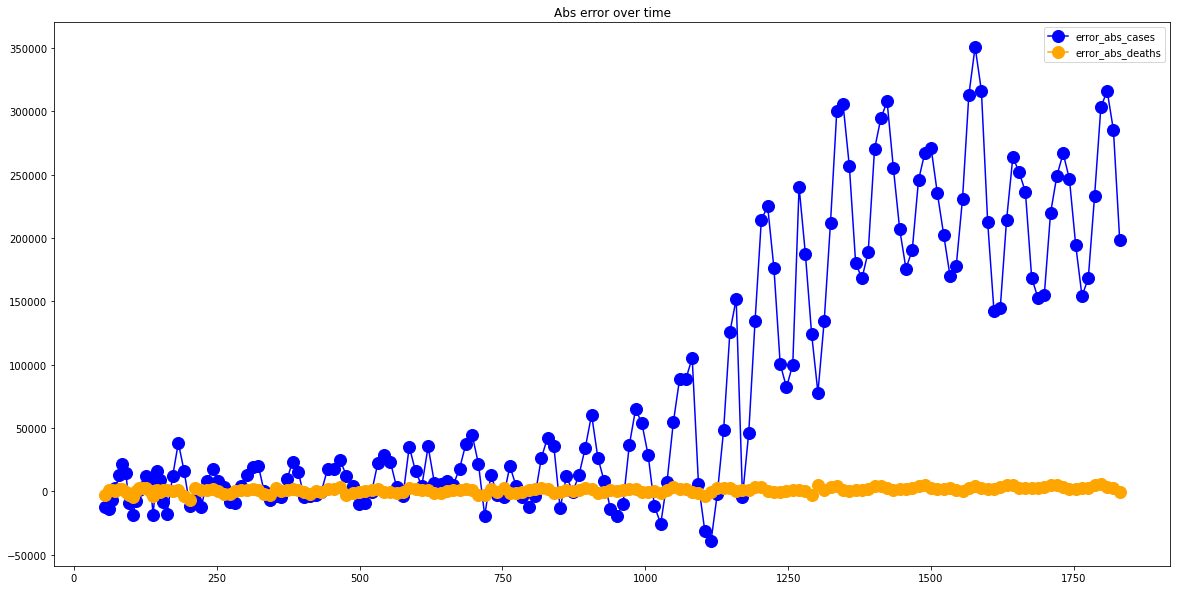

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1389.0109289617487
RMSE =  2179.121958082365
-- France performances for deaths --
MAE =  107.65573770491804
RMSE =  248.70294128832592


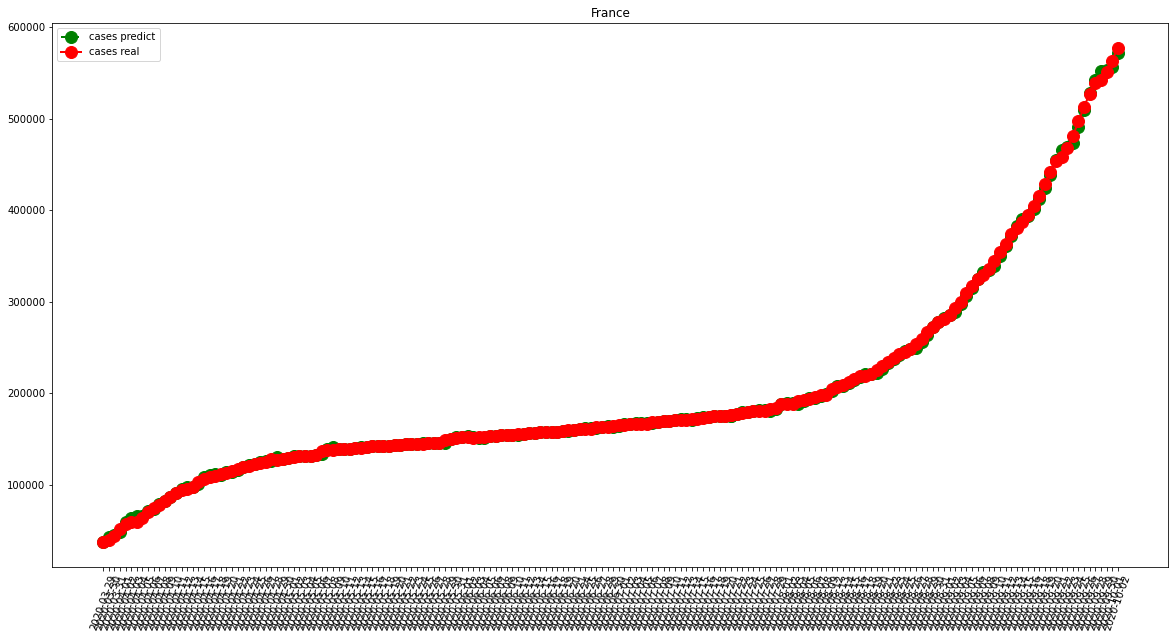

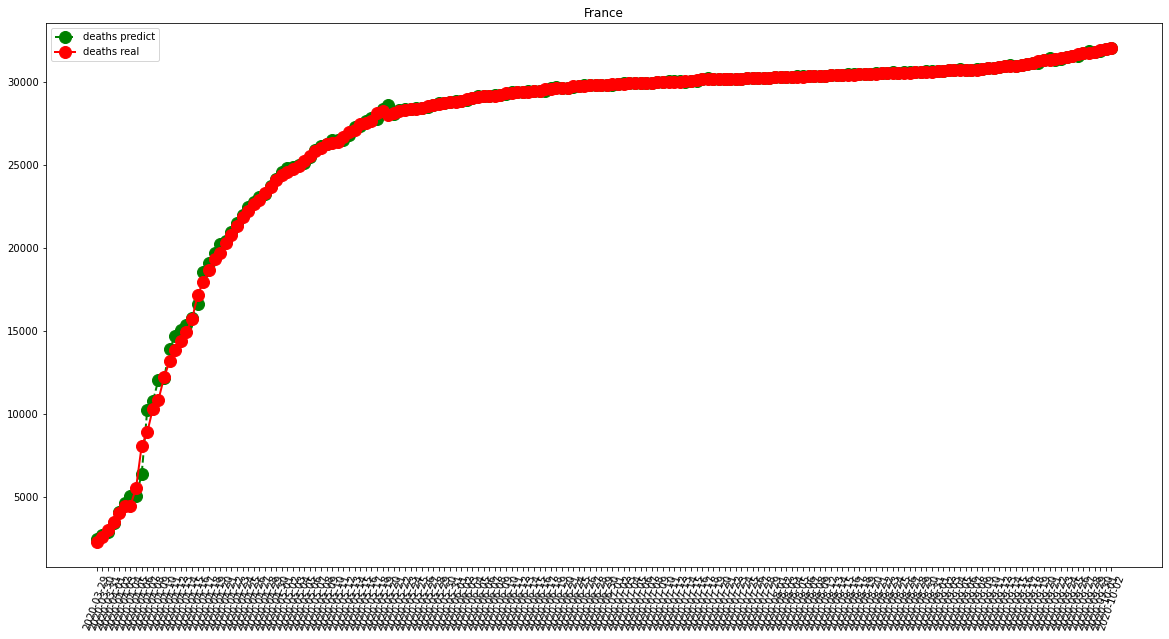

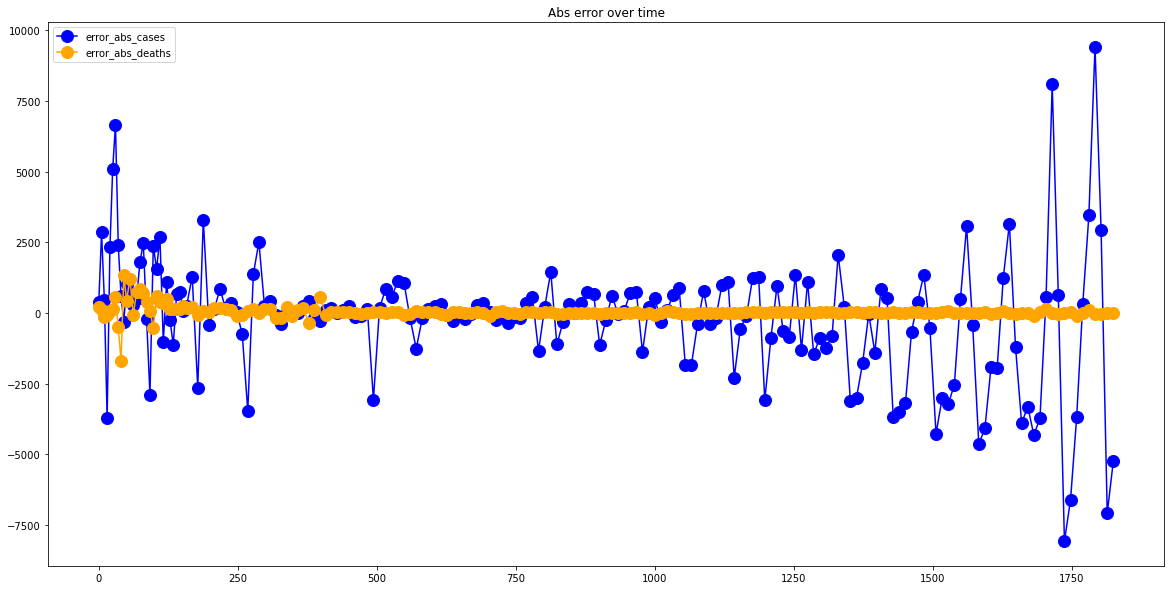

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  307.9945355191257
RMSE =  448.43635438535335
-- Italy performances for deaths --
MAE =  63.55191256830601
RMSE =  219.5413002459018


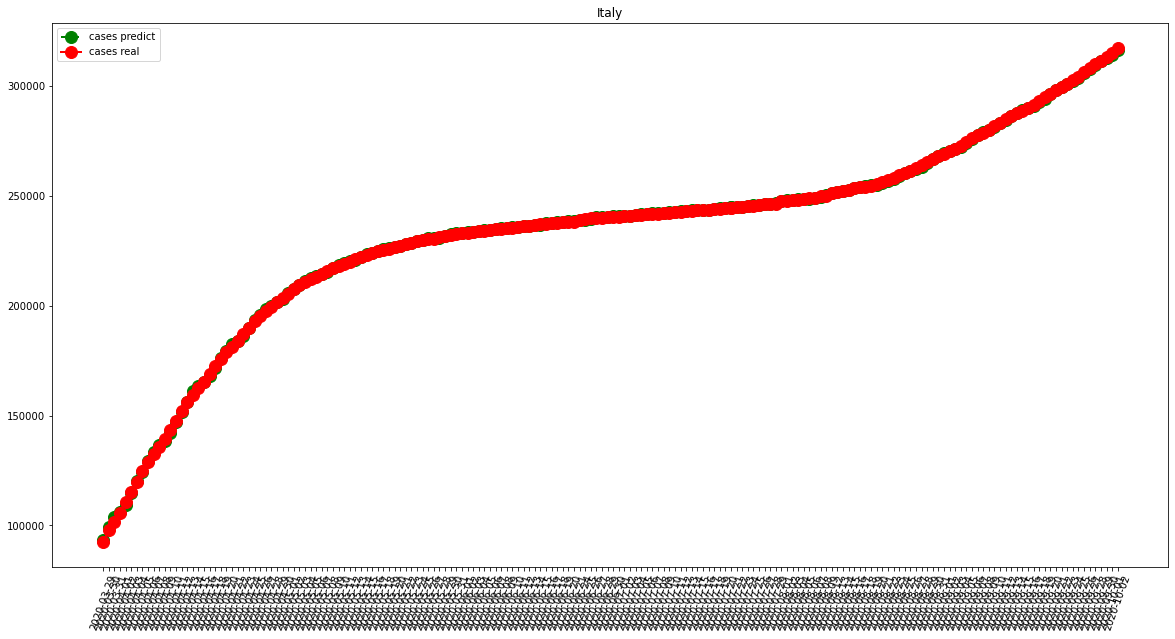

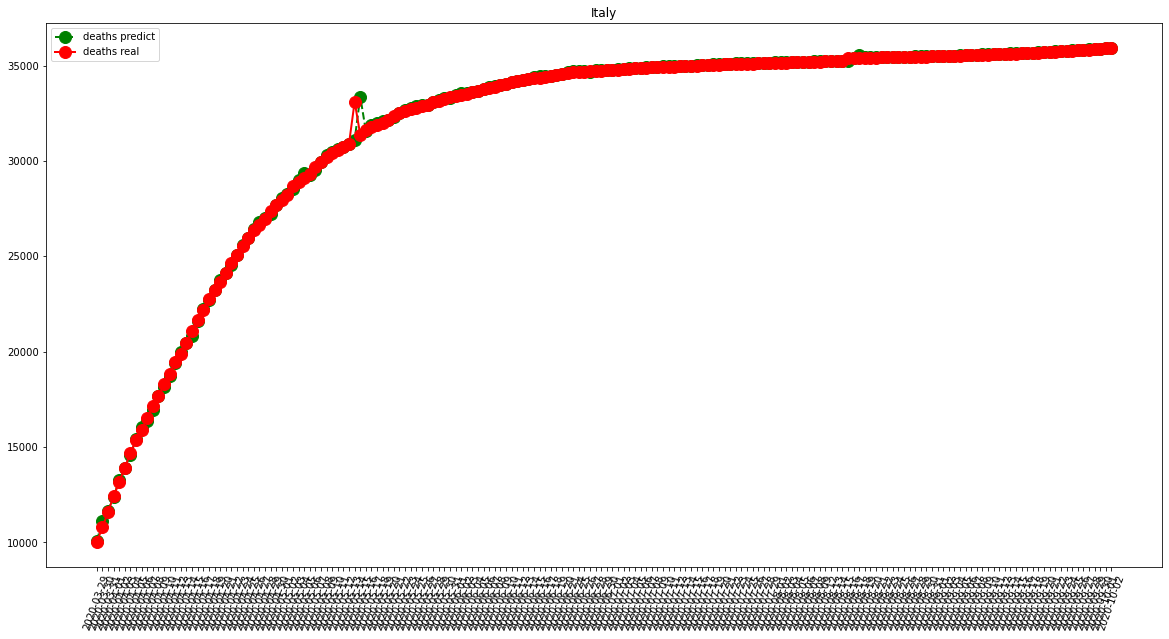

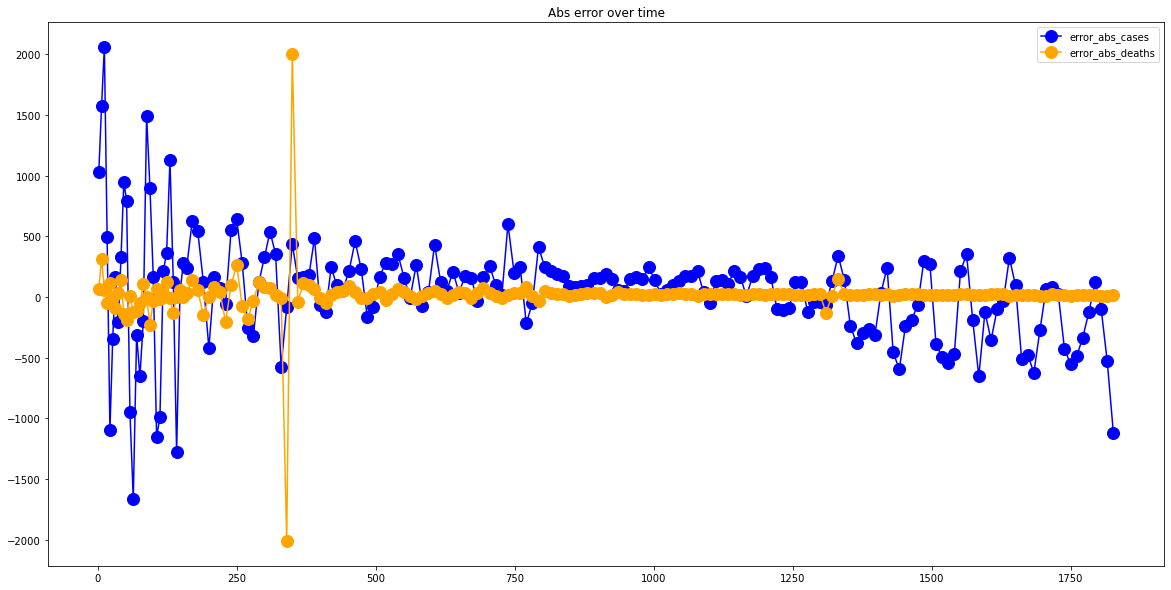

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2881.1803278688526
RMSE =  5633.638695445393
-- Spain performances for deaths --
MAE =  118.76502732240438
RMSE =  303.2435584438768


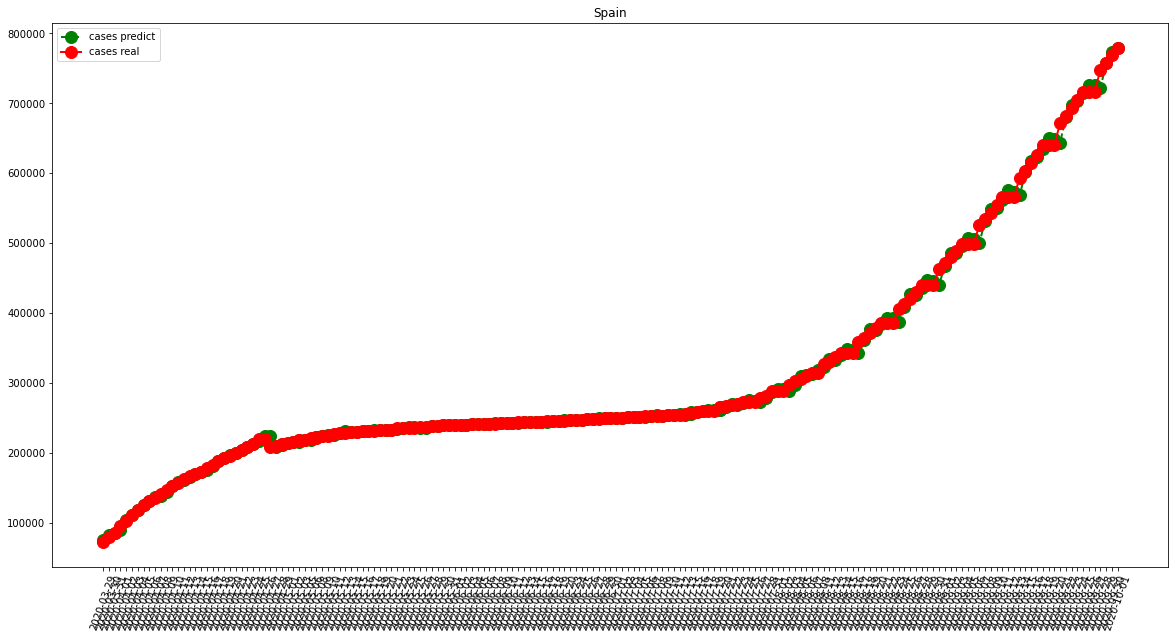

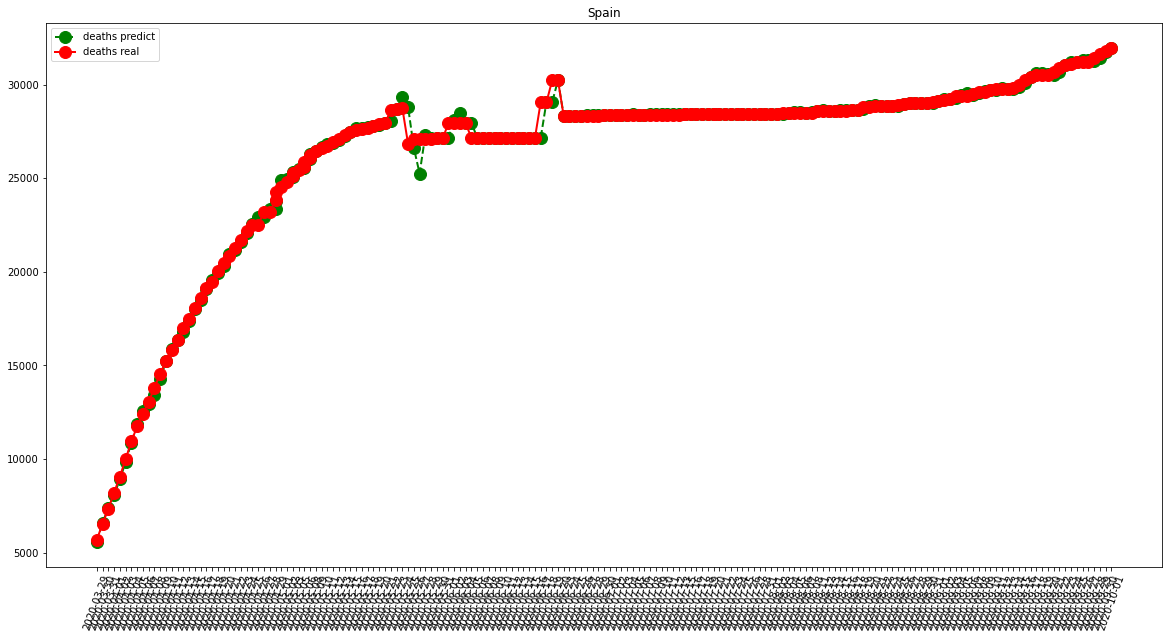

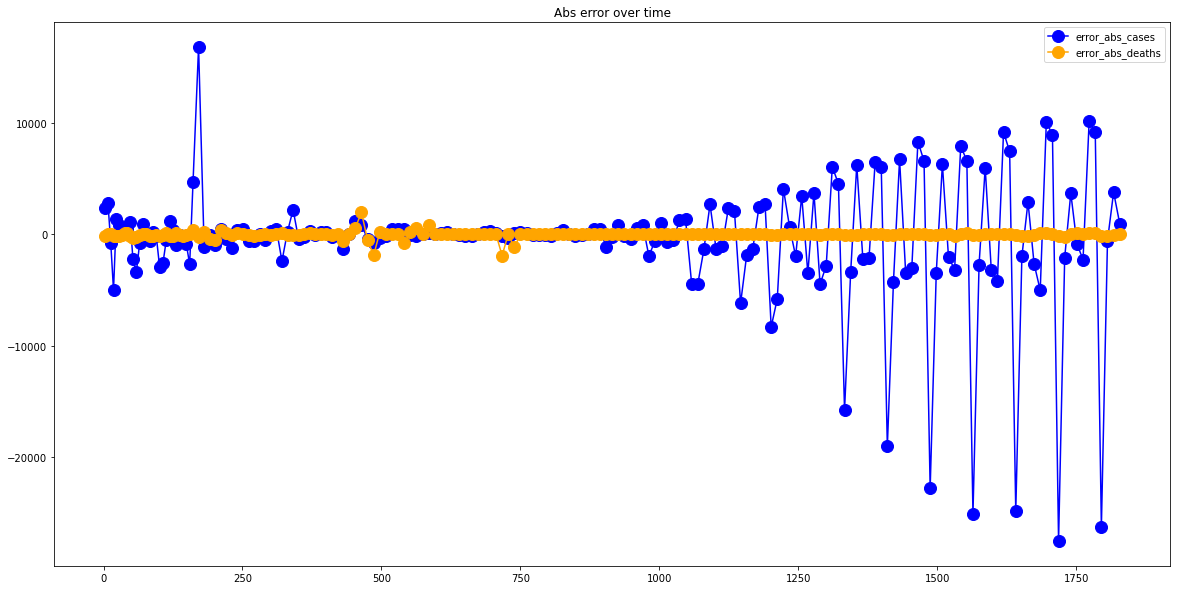

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16551.54098360656
RMSE =  23801.89047986106
-- United States performances for deaths --
MAE =  476.3387978142076
RMSE =  665.3182812012205


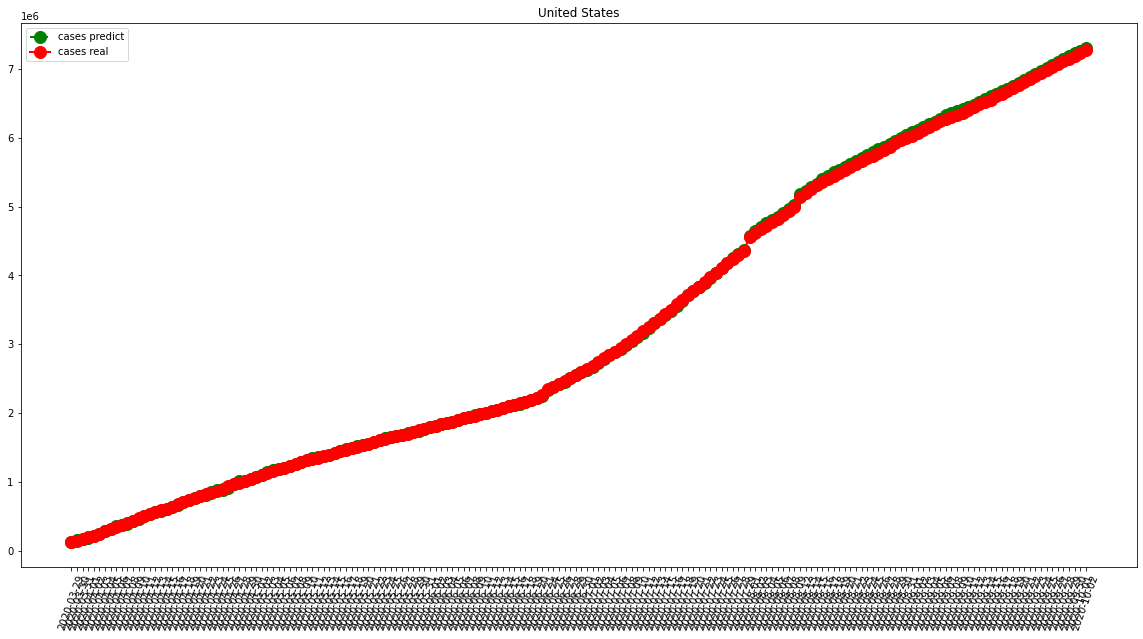

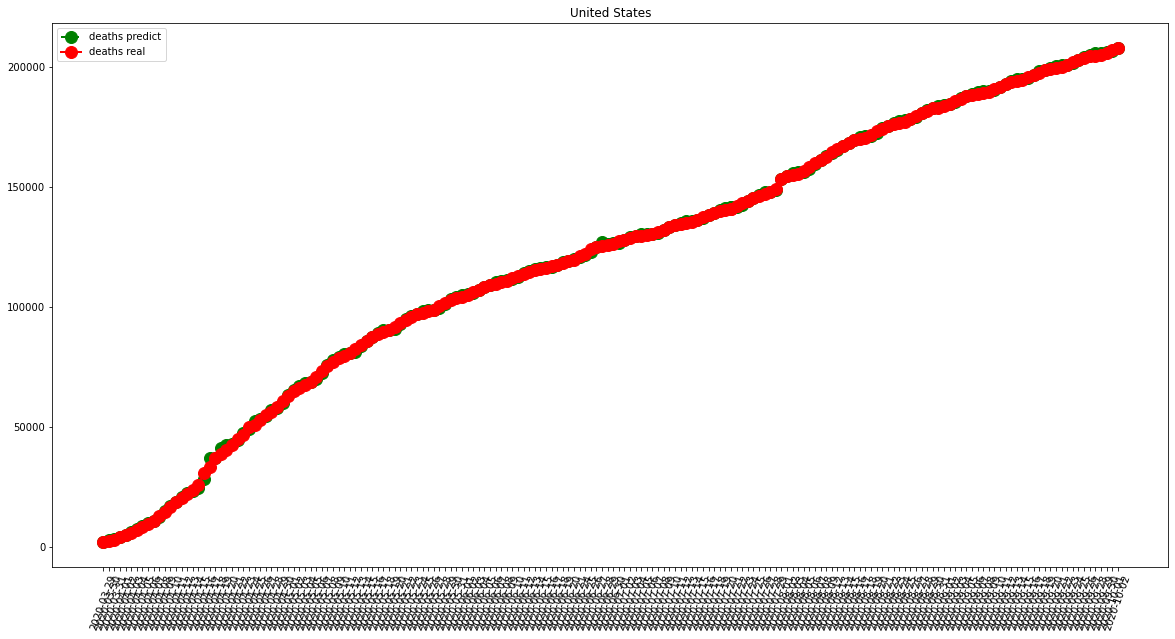

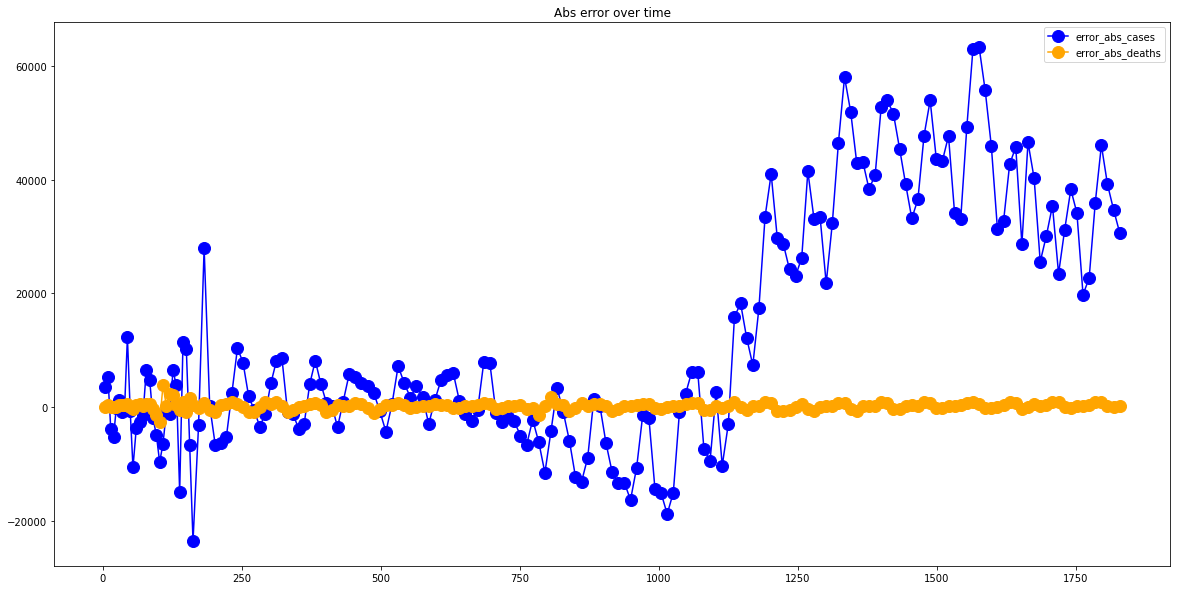

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  56.224043715846996
RMSE =  88.330013341053
-- China performances for deaths --
MAE =  23.601092896174862
RMSE =  116.09316496167925


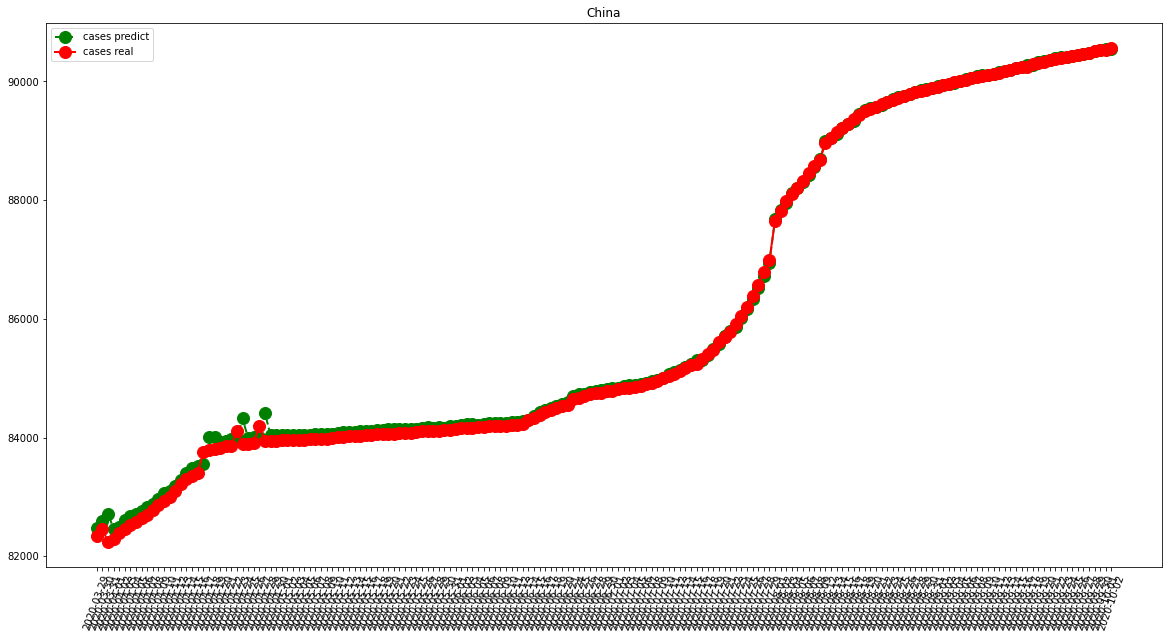

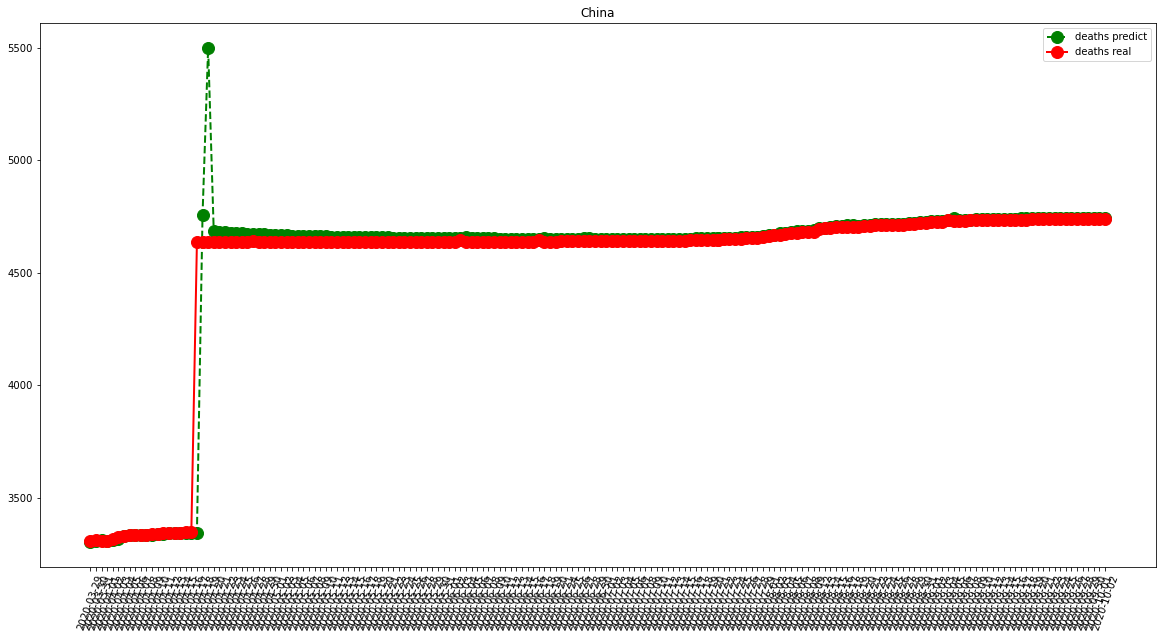

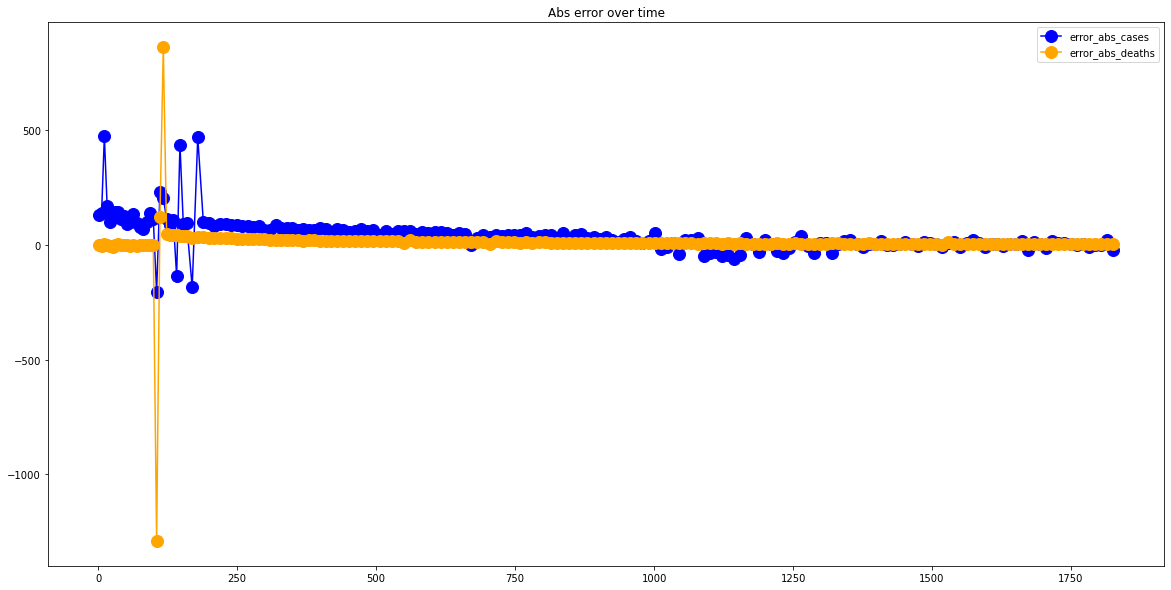

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1092.1225806451612
RMSE =  3431.3938717707424
-- United Kingdom performances for deaths --
MAE =  200.74193548387098
RMSE =  685.6110483921765


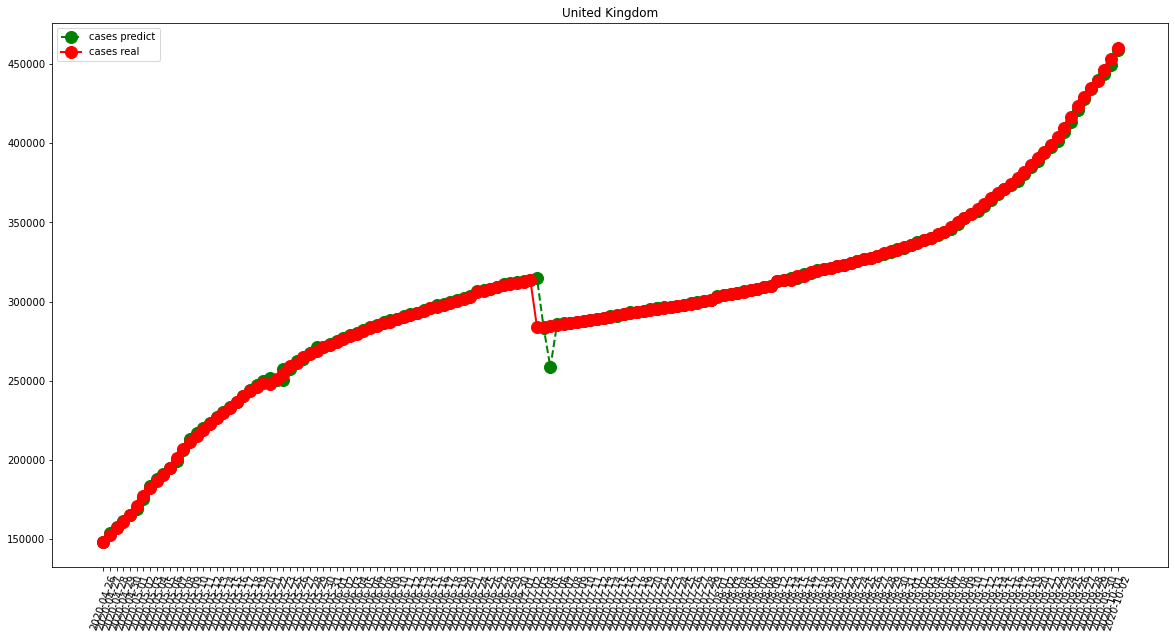

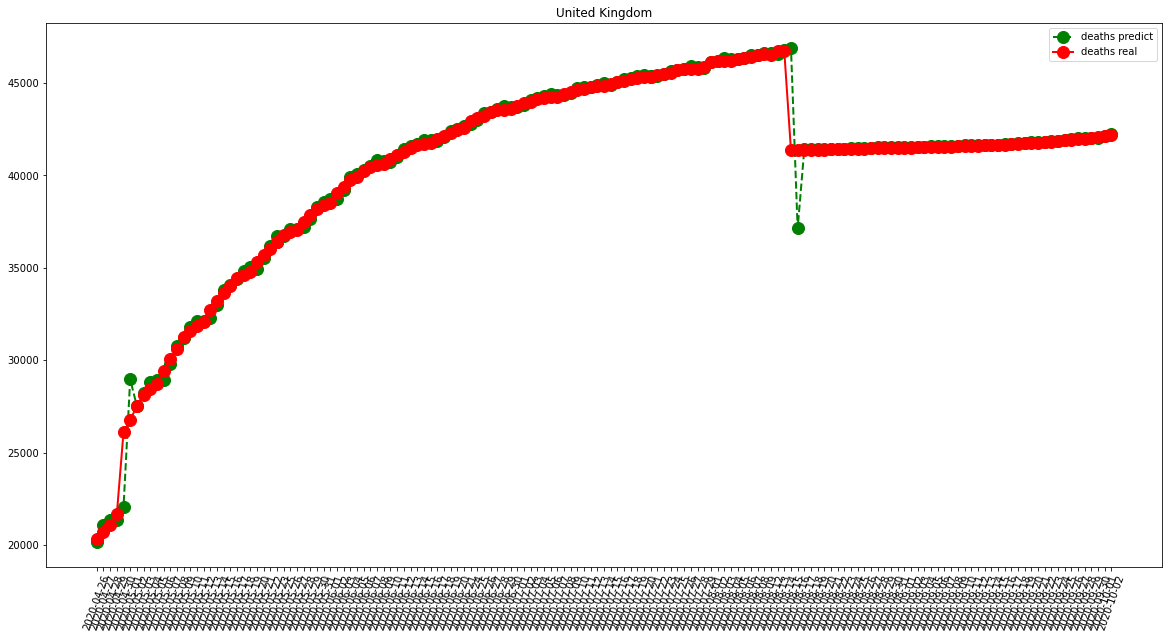

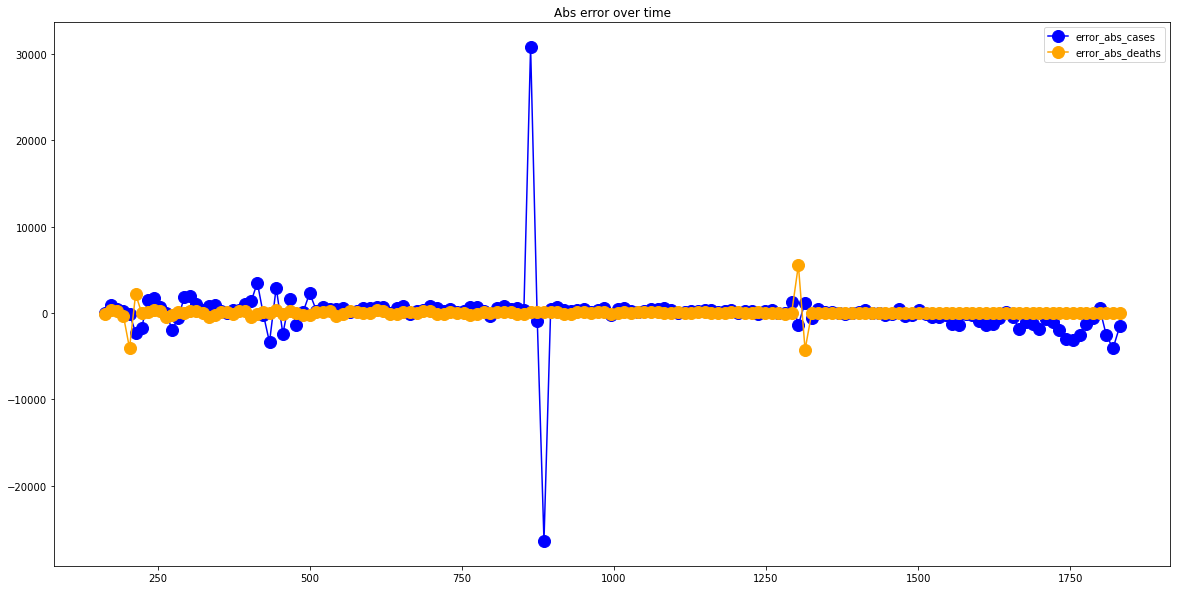

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  438.5290322580645
RMSE =  599.467376496729
-- Germany performances for deaths --
MAE =  18.096774193548388
RMSE =  35.464020840755616


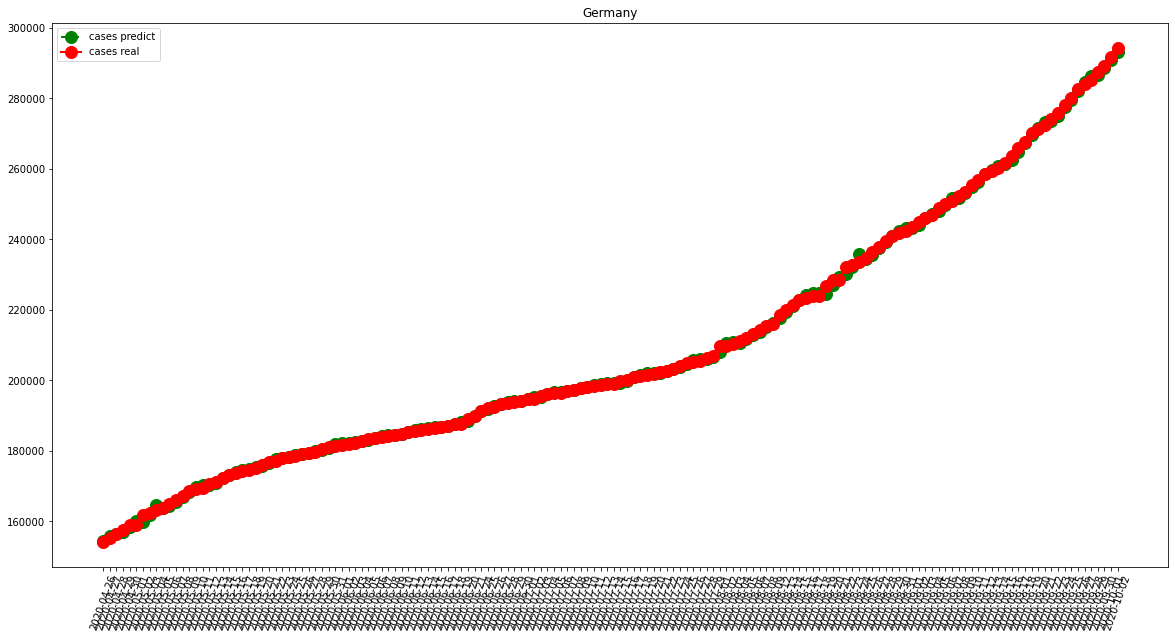

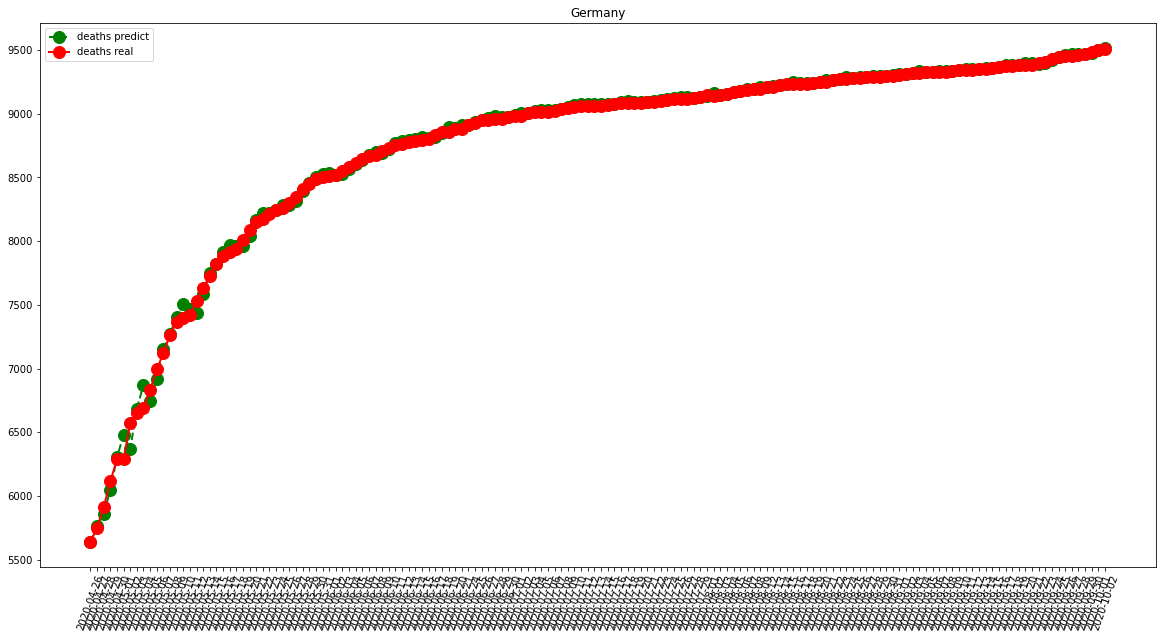

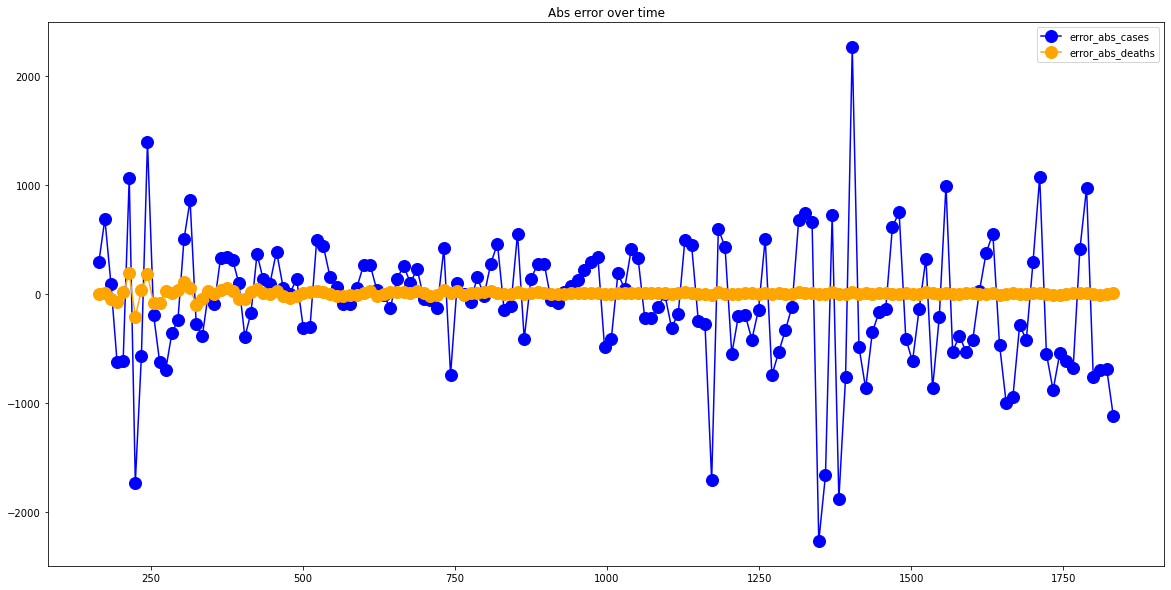

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  852.5483870967741
RMSE =  1197.2850928448024
-- Iran performances for deaths --
MAE =  49.70967741935484
RMSE =  82.53855404128308


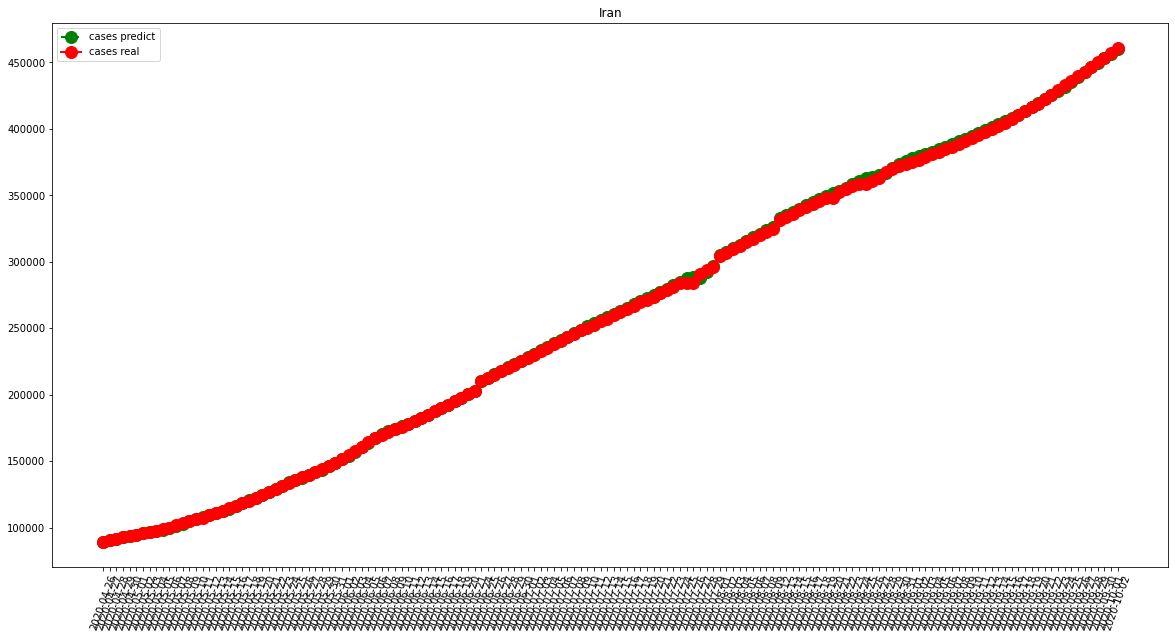

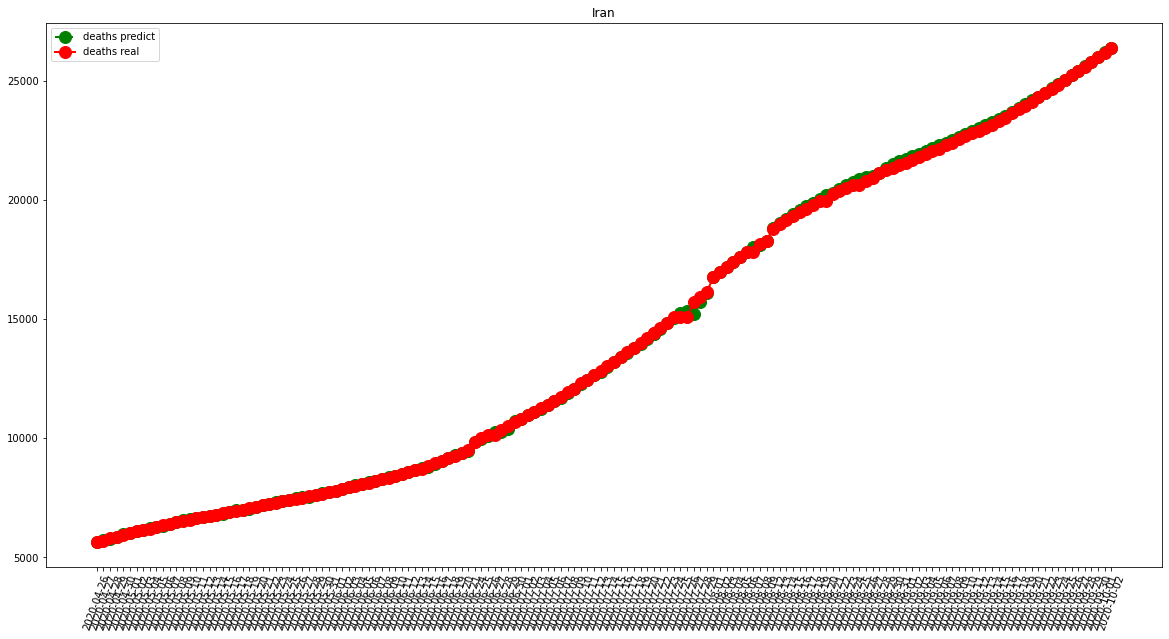

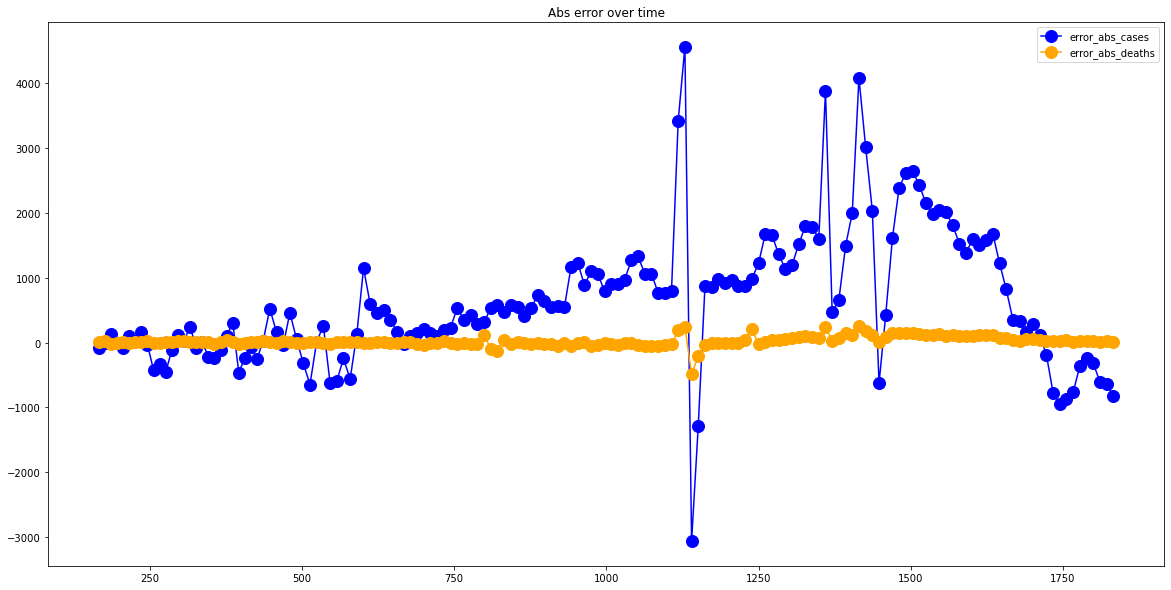

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.3483870967742
RMSE =  329.5706297593886
-- Turkey performances for deaths --
MAE =  15.69032258064516
RMSE =  81.82333447444029


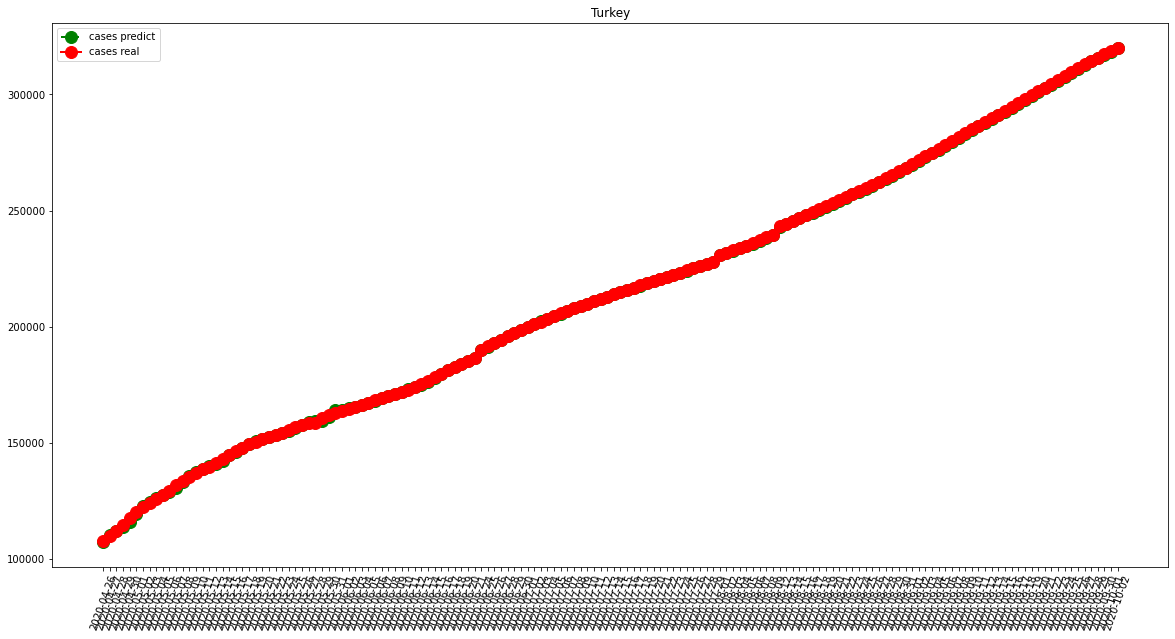

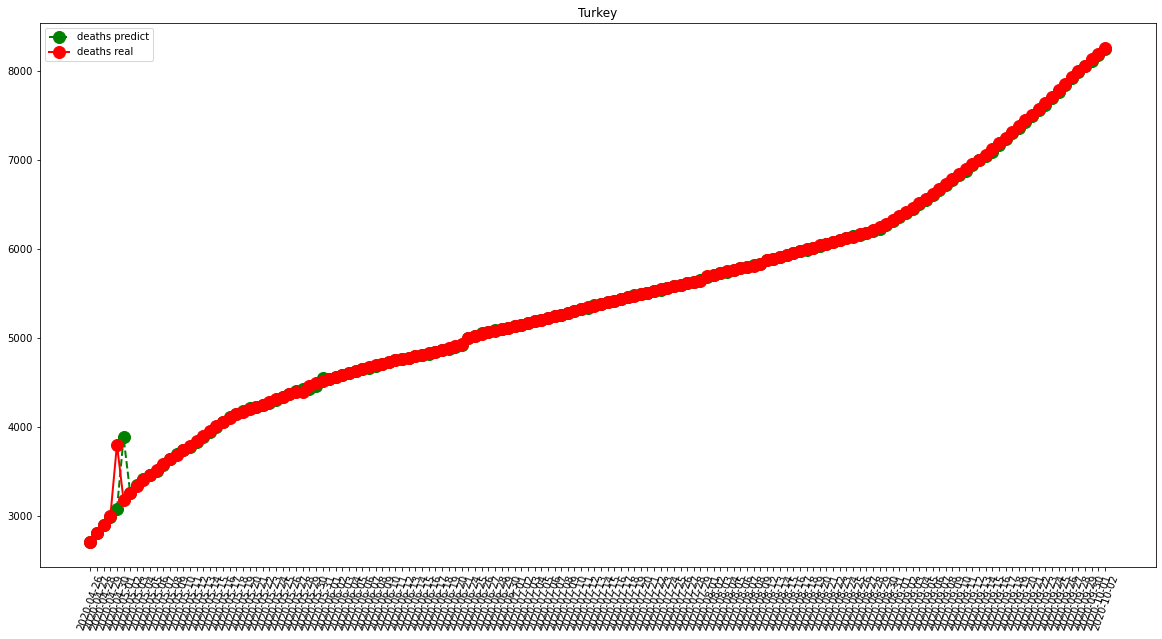

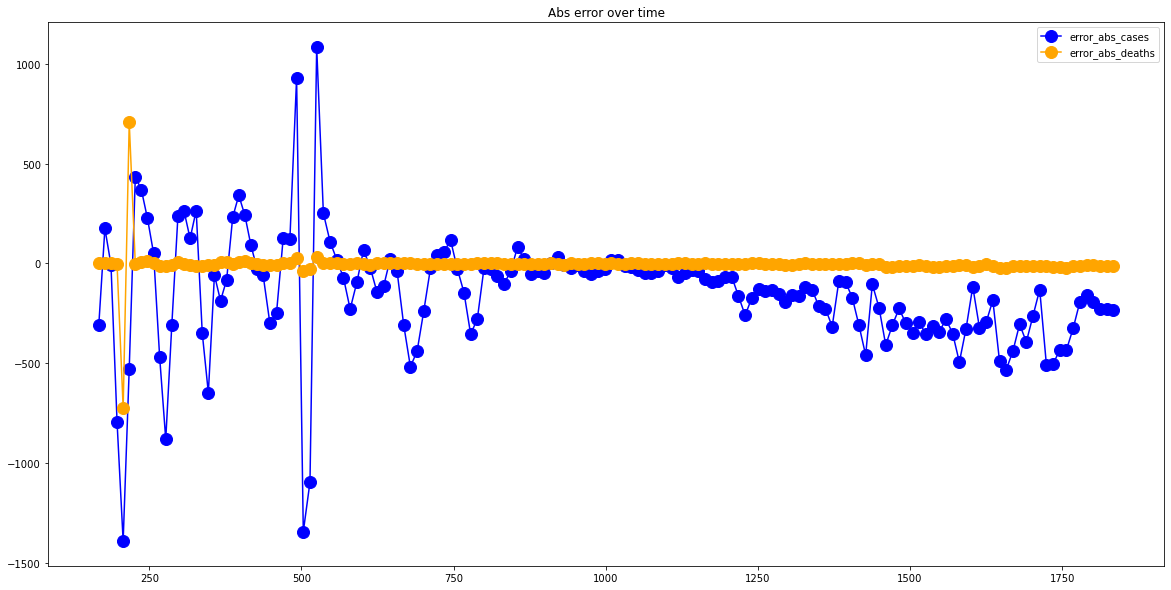

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17385.4609375
RMSE =  22443.75108274155
-- Brazil performances for deaths --
MAE =  508.6171875
RMSE =  612.326423109031


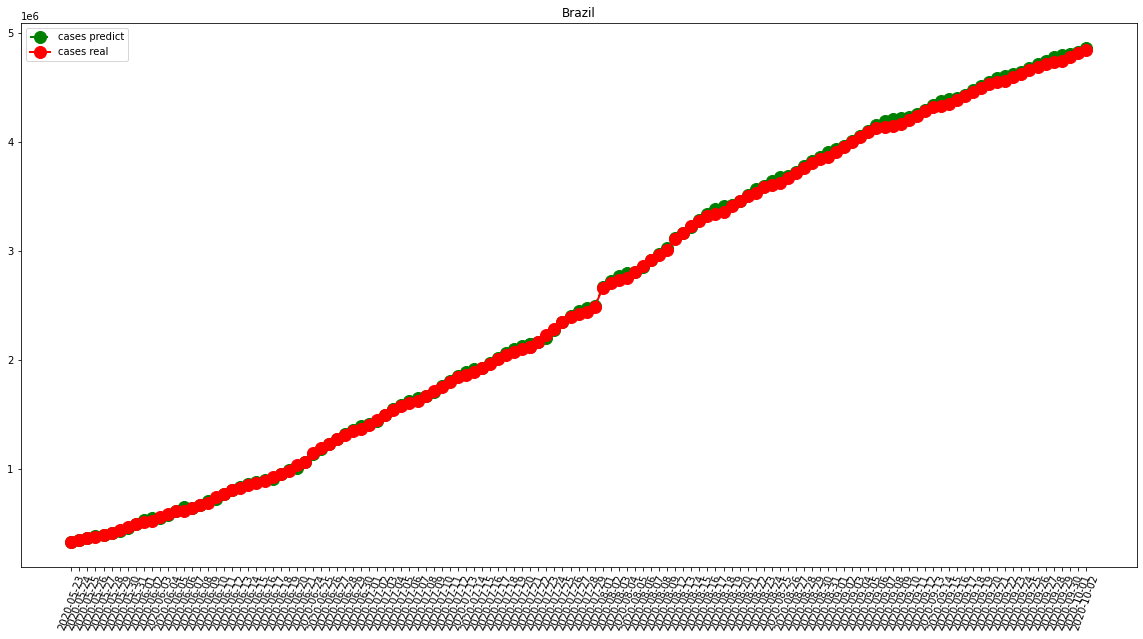

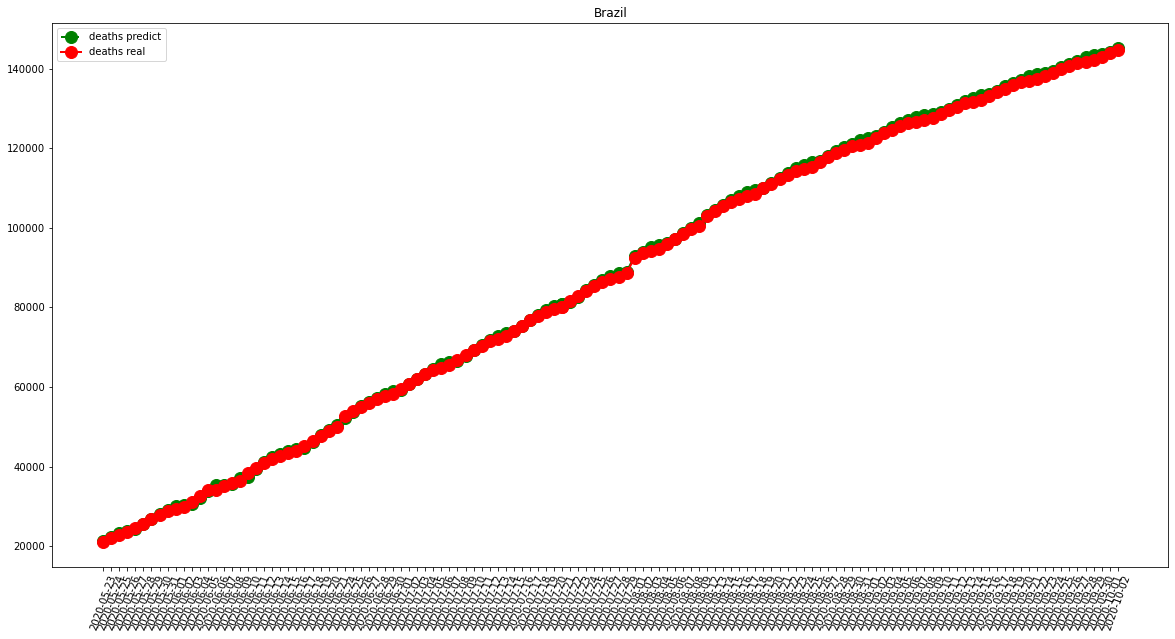

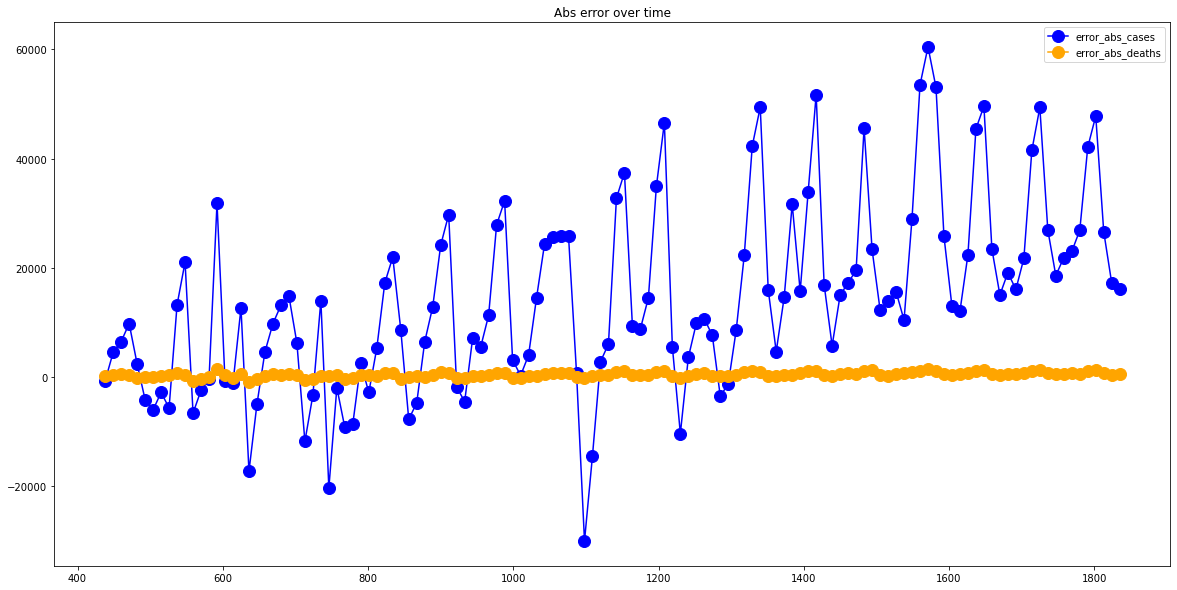

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)